<a href="https://colab.research.google.com/github/suniljangra16/Ann-using-pytorch/blob/main/ann_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving fmnist_small.csv to fmnist_small.csv


In [ ]:
df=pd.read_csv("fmnist_small.csv")

In [ ]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [ ]:
df.shape

(6000, 785)

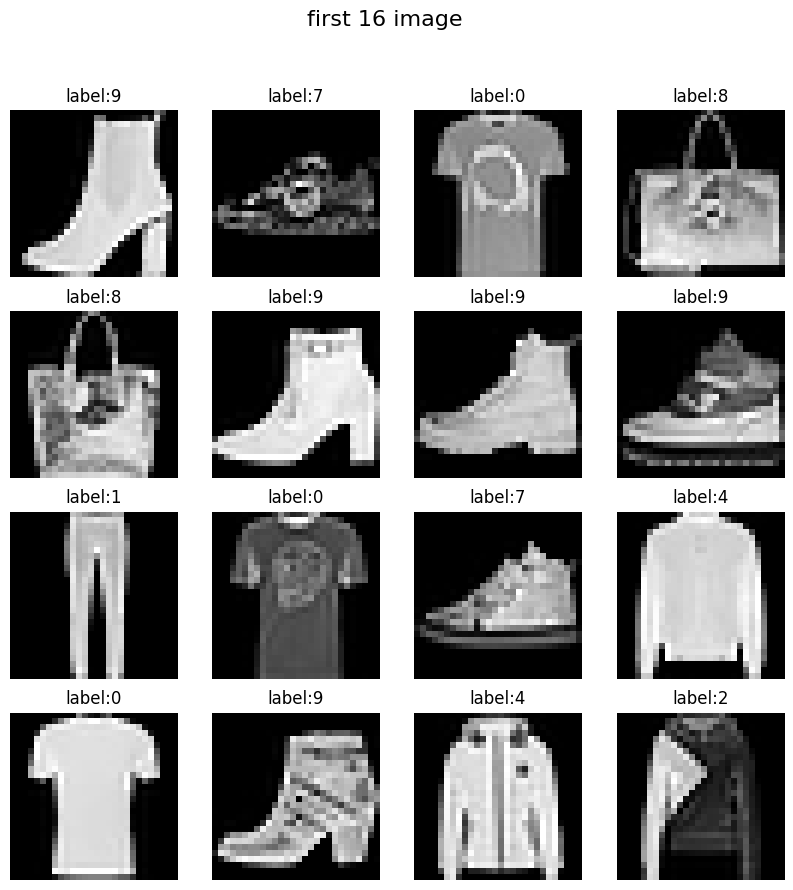

In [ ]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
plt.suptitle("first 16 image",fontsize=16)

#plot the first 16 image
for i,ax in enumerate(axes.flat):
  ax.imshow(np.array(df.iloc[i,1:]).reshape(28,28),cmap="gray")
  ax.axis('off')
  ax.set_title(f"label:{df.iloc[i,0]}")
plt.tight_layout
plt.show()

In [ ]:
# train test split
X=df.iloc[:,1:].values # all row and after 1 column
y=df.iloc[:,0].values # only first column and all row
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# scaling
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
# create custom dataset class
class CustomDataset(Dataset):

  def __init__(self,features,labels): # features is our x and label is our y
    self.features=torch.tensor(features,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features) #length of (x)-> input

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]



In [ ]:
# create train dataset object
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [ ]:
# create train  and test dataloader
train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=32,shuffle=False) # because we dont want to shuffle during prediction

In [ ]:
# define NN class
class MyNN(nn.Module):

  def__init__(self,num_features):

    super().__init__()

    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.linar(128,64),
        nn.ReLU(),
        nn.Linear(64,10) # you dont need to add softmax activation function it by default add
    )

    def forward(self,x):
      return self.model(x)

In [ ]:
# set learning rate and epochs
learning_rate=0.1
epochs=100

In [ ]:
# initiate the model-> tell how many features in our  model
model=MyNN(X_train.shape[1])

#loss optimize

criterian=nn.CrossEntropyLoss()

# optimizer technique use

optimizer=optim.Adam(model.parameters(),lr=learning_rate)



In [ ]:
# training loop
for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_dataloader:

    optimizer.zero_grad()

    outputs=model(batch_features) # forward pass

    loss=criterian(outputs,batch_labels) # loss calculate(batch labels) is our original label(y)

    loss.backward() # backward pass

    optimizer.step() # update gradient

    total_epoch_loss=total_epoch_loss+loss.item()

  avg_loss=total_epoch_loss/len(train_dataloader)

  print(f"epoch:{epoch+1},loss:{avg_loss}")


In [ ]:
# set model to eval  mode

model.eval()

In [ ]:
# evaluation code
total=0
correct=0

with torch.no_grad():
  for batch_features,batch_labels in test_dataloader:
    outputs=model(batch_features)
    _, predicted=torch.max(outputs,1)

    total=total+batch_labels.shape[0]

    correct=correct+(predicted==batch_labels).sum().item()

accuracy=correct/total
print(f"accuracy:{accuracy}")


